<div style="text-align: right"><strong>Supervised Model Comparison:</strong> <span style="color:darkred">OLS, Log Reg, KNN, Naive Bayes, Decision Tree, Random Forest</span> </div>

<a id="top"></a>

# <span style="color:darkblue">Credit Fraud</span>

__Author:__ Ryan Harper 

<a href='#ov'>Overview</a><br>
<a href='#exp'>Experiment</a><br>
<a href='#sec1'>1. Cleaning Data</a><br>
<a href='#sec2'>2. Exploring the Data</a><br>
<a href='#sec3'>3. Models:</a><br>
><a href='#seca'>A. LR - Ordinary Least Squares</a><br>
<a href='#secb'>B. LR - Logistic Regression</a> <a href='#secb1'> (Lasso)</a> <a href='#secb2'> (Ridge)</a><br>
<a href='#secc'>C. NN - K Nearest Neighbors</a><br>
<a href='#secd'>D. NN - Naive Bayes</a><br>
<a href='#sece'>E. NN - Decision Tree</a><br>
<a href='#secf'>F. Ensemble - Random Forest</a><br>

<a href='#sec4'>4. Model Comparison</a><br>

<a id="ov"></a>

# <span style="color:darkblue">Overview</span>  <a href='#top'>(top)</a>

__Data Source:__
> https://www.kaggle.com/mlg-ulb/creditcardfraud

__Thinkful Goal:__<br>
> "Using this credit card fraud dataset develop an algorithm to predict fraud. Prioritize correctly finding fraud rather than correctly labeling non-fraudulent transactions."

__Kaggle Goal:__<br>
> "Identify fraudulent credit card transactions."<br><br>"Given the class imbalance ratio, we recommend measuring the accuracy using the Area Under the Precision-Recall Curve (AUPRC). Confusion matrix accuracy is not meaningful for unbalanced classification."

__Variables:__
>__Time:__ _Elapsed time from the first measured transaction (similar to date-time). Total of 2 days_<br>
__V1-V29:__ _PCA component variables (used partly for anonymity)_ <br>
__Amount:__ _Expense for transaction_<br>
__Class:__ _Fraudulent or not (Fraud = 1)_

<a id="exp"></a>

# <span style="color:darkblue">Experiment</span> <a href='#top'>(top)</a>

__Observations:__
><li> Naive Bayes performed well with recall and precision with F1-score of .71<li>Decision Tree got an F1-score of .77<li>Random Forest performed the best with an F1-score of .85 on finding fraudulent charges

__Hypothesis:__ 
> Because data is binary, decision tree models and logistic regression models will have the best score.

__Thoughts:__
><li>--<li>--

__Method:__
> Using multiple different models. The aim of this project is to explore how different models can handle the data (target and features) and to see what information can be gained from using multiple different models. Ultimately, the goal is to determine which models are appropriate for a binary (discrete) target with features that are both qualitative (discrete) and quantitative (ranked/continuous).

<a id="sec1"></a>

# <span style="color:darkblue">Cleaning the Data</span>  <a href='#top'>(top)</a>

In [1]:
# import matplotlib and numpy together
%pylab

# Restricts popup window (change to '%matplotlib qt') for popup
%matplotlib inline 

Using matplotlib backend: MacOSX
Populating the interactive namespace from numpy and matplotlib


In [2]:
# iPython features
import time
from pprint import pprint

# Data processing
import pandas as pd
import plotly as plo
import seaborn as sns
from scipy import stats
from sklearn.metrics import classification_report, roc_curve,roc_auc_score

# Preparing Models
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import train_test_split

# Models
from sklearn import linear_model
from sklearn.neighbors import KNeighborsClassifier
from sklearn import tree
from sklearn.naive_bayes import BernoulliNB

# Ensemble
from sklearn import ensemble
from sklearn.model_selection import cross_val_score

#Visualization
from IPython.display import Image
import pydotplus
import graphviz

In [3]:
# Import data
creditcard = pd.read_csv('../data/unit3-6/creditcard.csv')

In [4]:
creditcard.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


_Variables appear to be anonymized and rescaled(?) for user privacy. Target variable is 'Class'_

In [5]:
creditcard.info(verbose=False, memory_usage=False,null_counts=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Columns: 31 entries, Time to Class
dtypes: float64(30), int64(1)

In [6]:
# Confirmation that there are no more null values
creditcard.isnull().values.any()

False

<a id="sec2"></a>

# <span style="color:darkblue">Exploring the Data</span>  <a href='#top'>(top)</a>

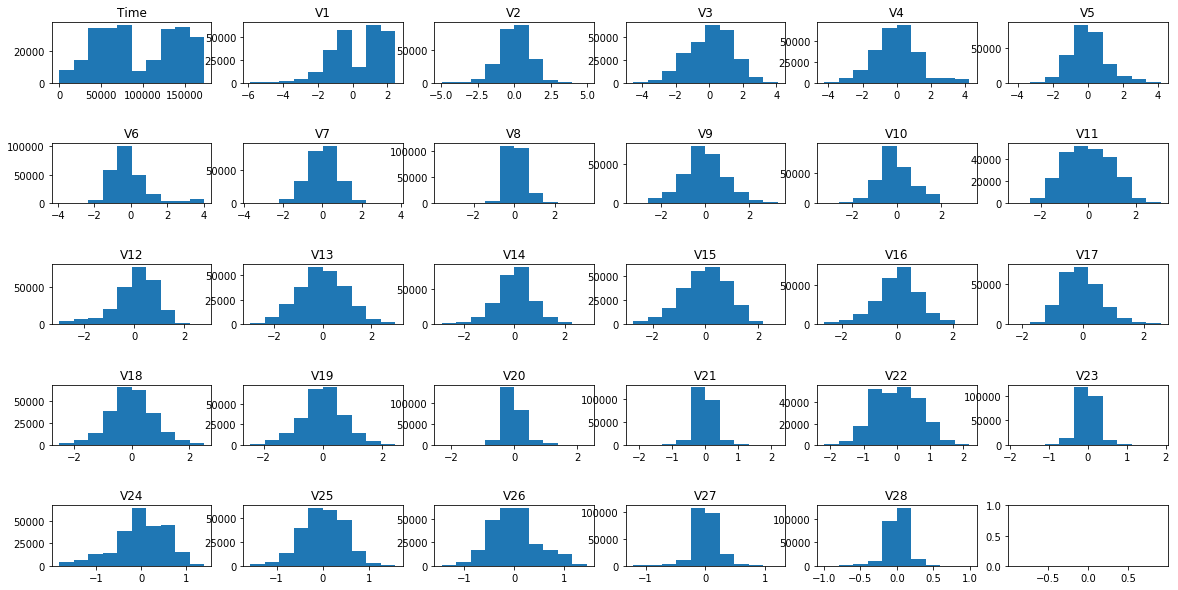

In [7]:
graph = creditcard[(np.abs(stats.zscore(creditcard)) < 3).all(axis=1)]

fig, axs = plt.subplots(5,6, figsize=(20, 10), facecolor='w', edgecolor='k')
fig.subplots_adjust(hspace = 1)

axs = axs.ravel()

for i in range(29):
    axs[i].hist(graph.iloc[:,i])
    axs[i].set_title((graph.columns)[i])
    plt.xlim(xmax=graph.iloc[:,i].max(),xmin=graph.iloc[:,i].min())

_V1-V28 data appear to be normally distributed_

_Time appears to be cyclical (may indicate possible time of day --i.e. late nights and early mornings would have lower total count of transactions)._

0    284315
1       492
Name: Class, dtype: int64


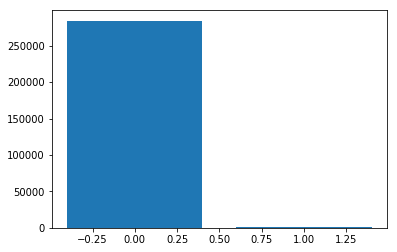

In [8]:
plt.bar([0,1],list(creditcard.Class.value_counts()))
print(creditcard.Class.value_counts())
plt.show()

In [9]:
creditcard.corr(method='spearman')

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
Time,1.000000,0.190647,-0.006419,-0.473348,-0.142156,0.226004,-0.111408,0.116722,-0.103882,0.017986,...,0.096564,0.132651,0.148505,-0.015980,-0.259220,0.000132,-0.035063,-0.143200,-0.040007,-0.011692
V1,0.190647,1.000000,-0.384328,-0.412095,0.101011,-0.106632,-0.086561,-0.227650,-0.236140,0.138614,...,-0.061958,-0.028827,0.145440,-0.000315,0.049291,0.006380,-0.104815,-0.207967,-0.086663,-0.042424
V2,-0.006419,-0.384328,1.000000,0.073967,0.155042,0.342701,-0.110393,0.426320,0.006980,-0.077880,...,-0.098255,-0.056478,-0.094982,0.012617,-0.085682,0.033865,0.129234,0.137976,-0.502052,0.051062
V3,-0.473348,-0.412095,0.073967,1.000000,0.060812,-0.223849,0.171263,-0.074582,0.164374,-0.030876,...,-0.040234,0.004404,-0.140076,-0.000559,0.031854,-0.016689,0.140724,0.180169,-0.000236,-0.059278
V4,-0.142156,0.101011,0.155042,0.060812,1.000000,0.021367,0.075185,0.059920,-0.009608,0.105248,...,0.038960,-0.004931,0.009615,-0.008782,0.060647,-0.064357,-0.033634,0.004757,-0.022117,0.063045
V5,0.226004,-0.106632,0.342701,-0.223849,0.021367,1.000000,-0.007577,0.431573,-0.057022,-0.056580,...,-0.040364,-0.010920,-0.108300,-0.023076,-0.015618,0.029513,0.012883,-0.027806,-0.314061,-0.030147
V6,-0.111408,-0.086561,-0.110393,0.171263,0.075185,-0.007577,1.000000,-0.292680,0.444053,0.028864,...,0.034595,0.040370,-0.050293,-0.135166,-0.011131,-0.023932,0.073772,0.020459,0.205452,-0.038410
V7,0.116722,-0.227650,0.426320,-0.074582,0.059920,0.431573,-0.292680,1.000000,-0.389213,-0.100252,...,-0.022250,-0.023750,-0.186343,-0.012879,-0.046468,0.016724,-0.094494,0.056405,-0.030003,-0.048308
V8,-0.103882,-0.236140,0.006980,0.164374,-0.009608,-0.057022,0.444053,-0.389213,1.000000,-0.002511,...,0.076569,0.019775,0.075212,-0.024536,-0.074303,-0.007648,0.189916,0.089700,0.004371,0.022706
V9,0.017986,0.138614,-0.077880,-0.030876,0.105248,-0.056580,0.028864,-0.100252,-0.002511,1.000000,...,-0.065773,0.001958,0.074164,-0.001572,-0.022575,0.026677,-0.001804,-0.103743,-0.077437,-0.049499


In [10]:
# # calculate the correlation matrix (spearman is chosen because most features are not continuous)
# corr = creditcard.corr(method='spearman')

# # plot the heatmap
# sns.heatmap(corr, 
#         xticklabels=corr.columns,
#         yticklabels=corr.columns)
# plt.show()

<a id="sec3"></a>

# <span style="color:darkblue">Models:</span>  <a href='#top'>(top)</a>

In [11]:
# feature data for models
features = creditcard.copy()
features.head()
features = features.sample(frac=1.0)

# # Convert categorical Data (letters) into discrete integer values
# features.lconslet = features.lconslet.astype('category').cat.codes
# features.fvowellet = features.fvowellet.astype('category').cat.codes

In [12]:
y = features['Class'].values.reshape(-1, 1).ravel()
X = features.loc[:, ~features.columns.isin(['Class'])]

print(np.shape(y))
print(np.shape(X))

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.15, random_state=0)

(284807,)
(284807, 30)


In [13]:
# Oversampling using NP/Pandas
X_res1,y_res1,_ = np.hsplit(pd.DataFrame(np.hstack((X_train,y_train.reshape(-1,1))) ).sample(frac=2.0,replace=True).values,np.array([X_train.shape[1],len(X_train)]))

In [14]:
# Oversampling using ImbLearn
sm = SMOTE(random_state=42)
X_res2, y_res2 = sm.fit_sample(X, y)

<a id="seca"></a>

### <span style="color:darkblue">A. LR - Ordinary Least Squares</span>  <a href='#top'>(top)</a>

> Target is binary so this model may not be appropriate <br>Many features are binary so model may not be appropriate <br>Predicted values are not binary and need to be rounded up/down

In [15]:
%%capture timeA --no-stderr
%%time

# Instantiate our model.
regr = linear_model.LinearRegression()

# Fit our model to our data.
regr.fit(X_train, y_train)

In [16]:
regr.coef_

array([-3.93502514e-09, -1.90341554e-03,  2.83351421e-03, -4.96708153e-03,
        3.69767230e-03, -2.24638806e-03, -1.62913750e-03, -6.75967626e-03,
        7.38725483e-04, -3.54685526e-03, -7.92814419e-03,  6.09619845e-03,
       -1.06208323e-02, -1.77066681e-04, -1.28745621e-02, -2.20295331e-04,
       -9.13476353e-03, -1.57823372e-02, -5.54793712e-03,  1.90281348e-03,
        1.36977499e-04,  2.07524744e-03,  2.16243699e-04,  9.32963475e-05,
       -4.61713515e-04,  3.16936332e-04,  3.97751407e-04,  1.70530403e-03,
        1.05151995e-03,  7.52484386e-06])

In [17]:
# Display the attributes
print('Coefficients: \n')
pprint(list(zip(X.columns,regr.coef_)))
print('\nIntercept: \n', regr.intercept_)
coef = list(zip(X.columns,regr.coef_))

Coefficients: 

[('Time', -3.935025142131555e-09),
 ('V1', -0.0019034155448996357),
 ('V2', 0.0028335142087856334),
 ('V3', -0.004967081529367572),
 ('V4', 0.00369767229832668),
 ('V5', -0.0022463880625016174),
 ('V6', -0.001629137499847739),
 ('V7', -0.006759676257560347),
 ('V8', 0.0007387254825642622),
 ('V9', -0.0035468552629544427),
 ('V10', -0.007928144188731286),
 ('V11', 0.006096198449544481),
 ('V12', -0.01062083233797448),
 ('V13', -0.000177066681418693),
 ('V14', -0.012874562134904052),
 ('V15', -0.00022029533078869146),
 ('V16', -0.009134763528770162),
 ('V17', -0.01578233716811085),
 ('V18', -0.0055479371211789846),
 ('V19', 0.0019028134782673536),
 ('V20', 0.0001369774990286651),
 ('V21', 0.002075247437383081),
 ('V22', 0.00021624369881704112),
 ('V23', 9.329634750523895e-05),
 ('V24', -0.0004617135152133411),
 ('V25', 0.00031693633225744733),
 ('V26', 0.0003977514066926274),
 ('V27', 0.0017053040304587156),
 ('V28', 0.0010515199511624428),
 ('Amount', 7.5248438556498995e

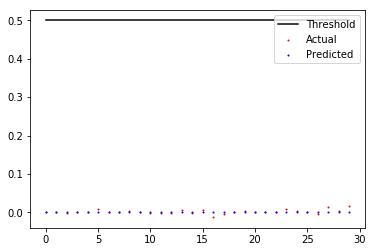

In [18]:
# Visualization of gender approximation
x = list(range(len(y_test[0:30])))
y =[0.5]*len(y_test[0:30])

predY = regr.predict(X_test)
plt.scatter(range(len(y_test[0:30])),predY[0:30],c='red',s=1)
plt.scatter(range(len(y_test[0:30])),y_test[0:30],c='blue',s=1)
plt.plot(x,y,c='black')
plt.legend(['Threshold','Actual','Predicted'],loc='upper right')
plt.show()

In [19]:
# score is low because of approximate values with lin regression - values need to be rounded
regr.score(X_test,y_test)
scoreA = regr.score(X_test,y_test)

In [20]:
print('Total Score: {0:.2f}%'.format(regr.score(X_test,y_test)*100))
print(classification_report(y_test, np.round(regr.predict(X_test),2).astype(int),target_names=['Not Fraud','Fraudulent']))

# Roc_Curve Is Problematic
# fpr, tpr, thresholds = roc_curve(y_test, regr.predict(X_test),pos_label=1)
# print('RocAuc score: {0:.2f}%'.format(roc_auc_score(y_test,regr.predict(X_test))))
# print('False Positives Rate (Precision?): {0:.2f}%'.format(fpr[1]*100))
# print('True Positives Rate (Recall?): {0:.2f}%'.format(tpr[1]*100))

Total Score: 55.32%
             precision    recall  f1-score   support

  Not Fraud       1.00      1.00      1.00     42636
 Fraudulent       0.81      0.15      0.25        86

avg / total       1.00      1.00      1.00     42722



_Oversampling Methods:_

In [21]:
regr.fit(X_res1, y_res1)

print('Total Score: {0:.2f}%'.format(regr.score(X_test,y_test)*100))
print(classification_report(y_test, np.round(regr.predict(X_test),2).astype(int),target_names=['Not Fraud','Fraudulent']))

Total Score: 55.38%
             precision    recall  f1-score   support

  Not Fraud       1.00      1.00      1.00     42636
 Fraudulent       0.83      0.17      0.29        86

avg / total       1.00      1.00      1.00     42722



In [22]:
regr.fit(X_res2, y_res2)

print('Total Score: {0:.2f}%'.format(regr.score(X_test,y_test)*100))
print(classification_report(y_test, np.round(regr.predict(X_test),2).astype(int),target_names=['Not Fraud','Fraudulent']))


Total Score: -1989.05%
             precision    recall  f1-score   support

  Not Fraud       1.00      1.00      1.00     42636
 Fraudulent       0.51      0.30      0.38        86

avg / total       1.00      1.00      1.00     42722



/Users/ryan/anaconda3/lib/python3.6/site-packages/sklearn/metrics/classification.py:1428: UserWarning:

labels size, 4, does not match size of target_names, 2

/Users/ryan/anaconda3/lib/python3.6/site-packages/sklearn/metrics/classification.py:1137: UndefinedMetricWarning:

Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples.



<a id="secb"></a>

### <span style="color:darkblue">B. LR - Logistic Regression</span>  <a href='#top'>(top)</a>

> Target is binary so logistic regression will operate on probabilities

In [23]:
%%capture timeB --no-stderr
%%time

# Instantiate our model.
lregr = linear_model.LogisticRegression()

# Fit our model to our data.
lregr.fit(X_train, y_train)

In [24]:
lregr.coef_

array([[-8.94468500e-05,  1.66639869e-01, -3.56445617e-01,
        -7.78610774e-01,  1.49133119e-01, -7.16042338e-03,
        -7.59986565e-02,  7.35537112e-02, -1.57158122e-01,
        -3.70569379e-01, -1.94662878e-01, -1.55284292e-01,
        -1.22474518e-02, -2.62020635e-01, -7.15709802e-01,
        -2.10826375e-01, -2.45218805e-01, -4.36597388e-01,
        -1.21282235e-02,  3.96836031e-02,  3.11165219e-02,
         1.45500611e-01,  1.88639863e-01,  2.20173206e-02,
        -2.19724781e-02, -1.67349288e-01,  2.25394837e-02,
        -4.90945535e-02,  3.19692088e-02, -6.88045980e-03]])

In [25]:
# Display the attributes
# print('Coefficients: \n')
# pprint(list(zip(X.columns,lregr.coef_[0])))
# print('\nIntercept: \n', lregr.intercept_)
# coef = list(zip(X.columns,lregr.coef_[0]))

In [26]:
print(lregr.score(X_test,y_test))
scoreB = lregr.score(X_test,y_test)

0.9989466785262863


In [27]:
print('Total Score: {0:.2f}%\n'.format(lregr.score(X_test,y_test)*100))
print(classification_report(y_test, lregr.predict(X_test),target_names=['Not Fraud','Fraudulent']))

Total Score: 99.89%

             precision    recall  f1-score   support

  Not Fraud       1.00      1.00      1.00     42636
 Fraudulent       0.78      0.66      0.72        86

avg / total       1.00      1.00      1.00     42722



_Oversampling Methods:_

In [44]:
lregr.fit(X_res1, y_res1)

print('Total Score: {0:.2f}%'.format(lregr.score(X_test,y_test)*100))
print(classification_report(y_test, np.round(lregr.predict(X_test),2).astype(int),target_names=['Not Fraud','Fraudulent']))

/Users/ryan/anaconda3/lib/python3.6/site-packages/sklearn/utils/validation.py:578: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().



Total Score: 99.90%
             precision    recall  f1-score   support

  Not Fraud       1.00      1.00      1.00     42636
 Fraudulent       0.78      0.67      0.72        86

avg / total       1.00      1.00      1.00     42722



In [46]:
lregr.fit(X_res2, y_res2)

print('Total Score: {0:.2f}%'.format(lregr.score(X_test,y_test)*100))
print(classification_report(y_test, np.round(lregr.predict(X_test),2).astype(int),target_names=['Not Fraud','Fraudulent']))


Total Score: 98.54%
             precision    recall  f1-score   support

  Not Fraud       1.00      0.99      0.99     42636
 Fraudulent       0.11      0.91      0.20        86

avg / total       1.00      0.99      0.99     42722



<a id="secb1"></a>

#### <span style="color:darkred">B1. Lasso</span>  <a href='#top'>(top)</a>

In [28]:
lamvalues = [.1,.25,.5,.75,1,3,5,10]

for lam in lamvalues:
    # Instantiate our model.
    lasso = linear_model.Lasso(alpha=lam,fit_intercept=False)
    
    # Fit our model to our data.
    lasso.fit(X_train, y_train)
    
    print('\u03bb={} \tLasso Score: {}'.format(lam, lasso.score(X_test,y_test)))

λ=0.1 	Lasso Score: -0.0009433810932355513
λ=0.25 	Lasso Score: -0.0009595203530392559
λ=0.5 	Lasso Score: -0.0009599510633238052
λ=0.75 	Lasso Score: -0.0009603873147139286
λ=1 	Lasso Score: -0.0009608291072091822
λ=3 	Lasso Score: -0.0009645629269621202
λ=5 	Lasso Score: -0.000968651377454055
λ=10 	Lasso Score: -0.000980424013167669


<a id="secb2"></a>

#### <span style="color:darkred">B2. Ridge</span>  <a href='#top'>(top)</a>

In [29]:
lamvalues = [.1,.5,.75,1,3,5,10]

for lam in lamvalues:
    # Instantiate our model.
    ridg = linear_model.Ridge(alpha=lam,fit_intercept=False)
    
    # Fit our model to our data.
    ridg.fit(X_train, y_train)
    
    print('\u03bb={} \tRidge Score: {}'.format(lam, ridg.score(X_test,y_test)))

λ=0.1 	Ridge Score: 0.553010364613977
λ=0.5 	Ridge Score: 0.5530101919263655
λ=0.75 	Ridge Score: 0.5530100839953787
λ=1 	Ridge Score: 0.5530099760634462
λ=3 	Ridge Score: 0.5530091125739379
λ=5 	Ridge Score: 0.5530082490239042
λ=10 	Ridge Score: 0.5530060898840548


_Lasso and Ridge are not good predictors so should I just be using them for parameter manipulation?_

<a id="secc"></a>

### <span style="color:darkblue">C. K Nearest Neighbors</span>  <a href='#top'>(top)</a>

> Can handle discrete values for target <br>Quantitative values are limited (not continuous) and might be problematic for nearest neighbors

In [30]:
%%capture timeC --no-stderr
%%time
neighbors = KNeighborsClassifier(n_neighbors=5)
neighbors.fit(X_train, y_train.ravel())

In [31]:
print(neighbors.score(X_test,y_test))
scoreC = neighbors.score(X_test,y_test)

0.9980572070595946


In [32]:
print('Total Score: {0:.2f}%\n'.format(neighbors.score(X_test,y_test)*100))

print(classification_report(y_test, neighbors.predict(X_test),target_names=['Not Fraud','Fraudulent']))

Total Score: 99.81%

             precision    recall  f1-score   support

  Not Fraud       1.00      1.00      1.00     42636
 Fraudulent       1.00      0.03      0.07        86

avg / total       1.00      1.00      1.00     42722



_Oversampling Methods:_

In [51]:
neighbors.fit(X_res1, y_res1)

print('Total Score: {0:.2f}%'.format(neighbors.score(X_test,y_test)*100))
print(classification_report(y_test, np.round(neighbors.predict(X_test),2).astype(int),target_names=['Not Fraud','Fraudulent']))

/Users/ryan/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:1: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().



Total Score: 99.79%
             precision    recall  f1-score   support

  Not Fraud       1.00      1.00      1.00     42636
 Fraudulent       0.40      0.07      0.12        86

avg / total       1.00      1.00      1.00     42722



In [52]:
neighbors.fit(X_res2, y_res2)

print('Total Score: {0:.2f}%'.format(neighbors.score(X_test,y_test)*100))
print(classification_report(y_test, np.round(neighbors.predict(X_test),2).astype(int),target_names=['Not Fraud','Fraudulent']))


Total Score: 96.98%
             precision    recall  f1-score   support

  Not Fraud       1.00      0.97      0.98     42636
 Fraudulent       0.06      1.00      0.12        86

avg / total       1.00      0.97      0.98     42722



<a id="secc"></a>

### <span style="color:darkblue">D. Naive Bayes - Bernoulli</span>  <a href='#top'>(top)</a>

> Should be best for boolean classification but has lowest prediction score

In [33]:
%%capture timeD --no-stderr
%%time
bnb = BernoulliNB()
bnb.fit(X_train, y_train)

In [34]:
print('Total Score: {0:.4f}\n'.format(bnb.score(X_test,y_test)))
scoreD = bnb.score(X_test,y_test)

print(classification_report(y_test, bnb.predict(X_test),target_names=['Not Fraud','Fraudulent']))

Total Score: 0.9991

             precision    recall  f1-score   support

  Not Fraud       1.00      1.00      1.00     42636
 Fraudulent       0.87      0.67      0.76        86

avg / total       1.00      1.00      1.00     42722



_Oversampling Methods:_

In [53]:
bnb.fit(X_res1, y_res1)

print('Total Score: {0:.2f}%'.format(bnb.score(X_test,y_test)*100))
print(classification_report(y_test, np.round(bnb.predict(X_test),2).astype(int),target_names=['Not Fraud','Fraudulent']))

/Users/ryan/anaconda3/lib/python3.6/site-packages/sklearn/utils/validation.py:578: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().



Total Score: 99.91%
             precision    recall  f1-score   support

  Not Fraud       1.00      1.00      1.00     42636
 Fraudulent       0.87      0.67      0.76        86

avg / total       1.00      1.00      1.00     42722



In [54]:
bnb.fit(X_res2, y_res2)

print('Total Score: {0:.2f}%'.format(bnb.score(X_test,y_test)*100))
print(classification_report(y_test, np.round(bnb.predict(X_test),2).astype(int),target_names=['Not Fraud','Fraudulent']))


Total Score: 99.67%
             precision    recall  f1-score   support

  Not Fraud       1.00      1.00      1.00     42636
 Fraudulent       0.36      0.84      0.51        86

avg / total       1.00      1.00      1.00     42722



<a id="sece"></a>

### <span style="color:darkblue">E. Decision Tree</span>  <a href='#top'>(top)</a>

> Visualizes most important features by hierarchy <br>Longer processing time

In [35]:
%%capture timeE --no-stderr
%%time

# Initialize and train our tree.
decision_tree = tree.DecisionTreeClassifier(
    criterion='entropy',
    max_features=1,
    max_depth=3)

decision_tree.fit(X_train, y_train)

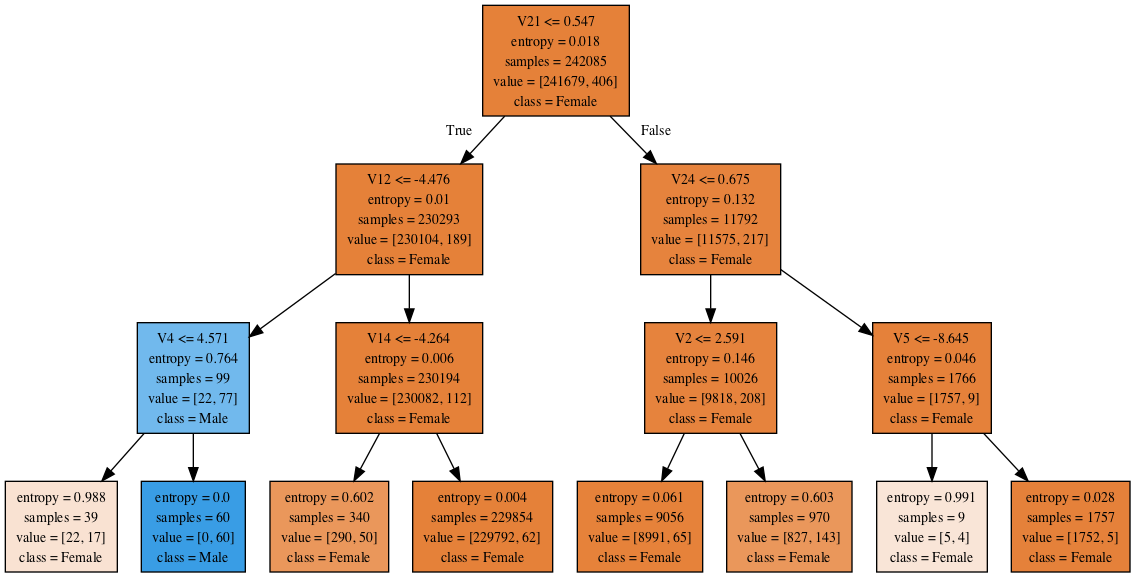

In [36]:
# Render our tree.
dot_data = tree.export_graphviz(
    decision_tree, out_file=None,
    feature_names=X.columns,
    class_names=['Female', 'Male'],
    filled=True
)

graph = pydotplus.graph_from_dot_data(dot_data)
Image(graph.create_png())

In [37]:
scoreE=decision_tree.score(X_test,y_test)
print('Total Score: {0:.4f}\n'.format(decision_tree.score(X_test,y_test)))
print(classification_report(y_test, decision_tree.predict(X_test),target_names=['Not Fraud','Fraudulent']))
t = classification_report(y_test, decision_tree.predict(X_test),target_names=['Not Fraud','Fraudulent'])

Total Score: 0.9983

             precision    recall  f1-score   support

  Not Fraud       1.00      1.00      1.00     42636
 Fraudulent       0.93      0.15      0.26        86

avg / total       1.00      1.00      1.00     42722



_Oversampling Methods:_

In [57]:
decision_tree.fit(X_res1, y_res1)

print('Total Score: {0:.2f}%'.format(decision_tree.score(X_test,y_test)*100))
print(classification_report(y_test, np.round(decision_tree.predict(X_test),2).astype(int),target_names=['Not Fraud','Fraudulent']))

Total Score: 99.82%
             precision    recall  f1-score   support

  Not Fraud       1.00      1.00      1.00     42636
 Fraudulent       0.63      0.20      0.30        86

avg / total       1.00      1.00      1.00     42722



In [58]:
decision_tree.fit(X_res2, y_res2)

print('Total Score: {0:.2f}%'.format(decision_tree.score(X_test,y_test)*100))
print(classification_report(y_test, np.round(decision_tree.predict(X_test),2).astype(int),target_names=['Not Fraud','Fraudulent']))


Total Score: 83.30%
             precision    recall  f1-score   support

  Not Fraud       1.00      0.83      0.91     42636
 Fraudulent       0.01      0.73      0.02        86

avg / total       1.00      0.83      0.91     42722



<a id="secf"></a>

### <span style="color:darkblue">F. Random Forest</span>  <a href='#top'>(top)</a>

> Runs decision tree multiple times for best output <br>Longest processing time

In [38]:
%%capture timeF --no-stderr
%%time

rfc = ensemble.RandomForestClassifier(n_estimators=20)
rfc.fit(X_train,y_train.ravel())

In [39]:
cvs = cross_val_score(rfc, X_test, y_test.ravel(), cv=5)
print(cvs)
scoreF = cvs.sum()/len(cvs)

[0.9991809  0.99941479 0.99953184 0.99918071 0.99941479]


In [41]:
rfc.feature_importances_
importance = list(zip(X.columns,rfc.feature_importances_))

In [40]:
print('Total Score: {0:.4f}\n'.format(rfc.score(X_train,y_train)))
print(classification_report(y_test, rfc.predict(X_test),target_names=['Not Fraud','Fraudulent']))

Total Score: 1.0000

             precision    recall  f1-score   support

  Not Fraud       1.00      1.00      1.00     42636
 Fraudulent       0.96      0.78      0.86        86

avg / total       1.00      1.00      1.00     42722



_Oversampling Methods:_

In [55]:
rfc.fit(X_res1, y_res1)

print('Total Score: {0:.2f}%'.format(rfc.score(X_test,y_test)*100))
print(classification_report(y_test, np.round(rfc.predict(X_test),2).astype(int),target_names=['Not Fraud','Fraudulent']))

/Users/ryan/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:1: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().



Total Score: 99.96%
             precision    recall  f1-score   support

  Not Fraud       1.00      1.00      1.00     42636
 Fraudulent       0.97      0.83      0.89        86

avg / total       1.00      1.00      1.00     42722



In [56]:
rfc.fit(X_res2, y_res2)

print('Total Score: {0:.2f}%'.format(rfc.score(X_test,y_test)*100))
print(classification_report(y_test, np.round(rfc.predict(X_test),2).astype(int),target_names=['Not Fraud','Fraudulent']))


Total Score: 100.00%
             precision    recall  f1-score   support

  Not Fraud       1.00      1.00      1.00     42636
 Fraudulent       1.00      1.00      1.00        86

avg / total       1.00      1.00      1.00     42722



<a id="sec4"></a>

# <span style="color:darkblue">4. Model Comparison</span>  <a href='#top'>(top)</a>

In [43]:
models = ['Ordinary Least Squares','Logistic Regression','K Nearest Neigbbors','Naive Bayes Bernoulli','Decision Tree','Random Forest']
times = [timeA,timeB,timeC,timeD,timeE,timeF]
timesfinal = []
for time in times:
    timesfinal.append((((time.stdout.splitlines())[0].split(','))[0].split('user '))[1])
score = [str(scoreA)[0:7]+('*'),scoreB,scoreC,scoreD,scoreE,scoreF]

dfModels = pd.DataFrame(index=models)
dfModels['cpu time'] = timesfinal
dfModels['score'] = score
dfModels

,cpu time,score
Ordinary Least Squares,455 ms,0.55321*
Logistic Regression,2.63 s,0.998947
K Nearest Neigbbors,1.22 s,0.998057
Naive Bayes Bernoulli,171 ms,0.999134
Decision Tree,151 ms,0.998268
Random Forest,38.8 s,0.999345


_All models have a very high score but are they predicting an accurate percentage of fraudulent transactions?_

_I ran a confusion matrix (classification report) to determine the successful prediction of fraudulent transactions._